# Домашнее задание 9

Это домашнее задание по материалам 12го семинара. Дедлайн по отправке - 23:55 5 мая. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_9

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим одномерную задачу минимизации:
\begin{equation}
\min_{x \in \mathbb{R}} f(x) = x \arctan x - \frac{1}{2} \log (1 + x^2).
\end{equation}

__(а)__ Реализуйте для этой задачи метод градиентного спуска и метод Ньютона. Нарисуйте графики сходимости данных методов для двух разных точек старта $x^0 = 1.3$ и $x^0 = 1.5$. Сделайте вывод. В общем случае для каких $x^0$ еще есть сходимость метода Ньютона, а для каких она пропадает? Почему?

$f'(x)=\arctan(x)$

$f''(x)=\frac{1}{1+x^2}$

### Градиентный спуск

In [1]:
import math
def f(x):
    return x*math.atan(x)-0.5*math.log(1+x*x)
def grad_f(x):
    return math.atan(x)

In [2]:
import numpy as np
def gradient_decline(grad_f,step,x_start,iterations):
    gradients=[]
    x=x_start
    for i in range(iterations):
        x=x-step*grad_f(x)
        gradients.append(np.abs(grad_f(x)))
    return x,gradients

In [3]:
gd_res=gradient_decline(grad_f=grad_f,step=1,x_start=1.3,iterations=5)

### Метод Ньютона

In [4]:
def inv_hes(x):
    return 1+x*x

In [5]:
def newton(inv_hes,grad_f,x_start,iterations):
    x=x_start
    gradients=[]
    for i in range(iterations):
        x=x-inv_hes(x)*grad_f(x)
        gradients.append(np.abs(grad_f(x)))
    return x,gradients

In [6]:
nw_res=newton(inv_hes=inv_hes,grad_f=grad_f,x_start=1.3,iterations=5)

__Смотрим на стартовой точке $x_0$=1.3__

In [7]:
import matplotlib.pyplot as plt
plt.title("GD vs Newton, x_0=1.3")
plt.plot(range(len(gd_res[1])),gd_res[1],label="gradient decline")
plt.plot(range(len(nw_res[1])),nw_res[1],label="newton")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
plt.yscale("log")

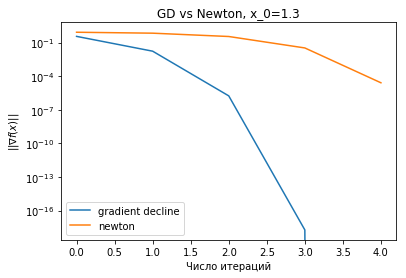

In [8]:
import matplotlib.pyplot as plt
plt.title("GD vs Newton, x_0=1.3")
plt.plot(range(len(gd_res[1])),gd_res[1],label="gradient decline")
plt.plot(range(len(nw_res[1])),nw_res[1],label="newton")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
plt.yscale("log")

__Смотрим на стартовой точке $x_0$=1.5__

In [9]:
gd_res=gradient_decline(grad_f=grad_f,step=1,x_start=1.5,iterations=5)
nw_res=newton(inv_hes=inv_hes,grad_f=grad_f,x_start=1.5,iterations=5)

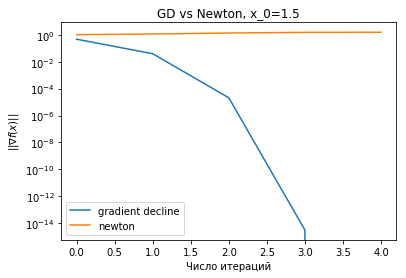

In [10]:
import matplotlib.pyplot as plt
plt.title("GD vs Newton, x_0=1.5")
plt.plot(range(len(gd_res[1])),gd_res[1],label="gradient decline")
plt.plot(range(len(nw_res[1])),nw_res[1],label="newton")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
plt.yscale("log")

__Вывод__ : для сходимости ньютона нужна хорошая точка. Точка хорошая - сходимость хорошая, точка плохая - сходимость не сходимость. Градиентному спуску, с другой стороны, начальная точка не витальна.

### __Про общую сходимость__

В анализе сходимости Ньютона фигурирует константа $M : $ $||\nabla^2 f(x)-\nabla^2f(y)||\leq M||x-y||$

Ее можно оценить, оценив модуль третьей производной функции. Здесь можно получить $M=3\sqrt{3}/8$

В анализе сходимости так-же фигурирует константа $L$ : матрица $\nabla^2 f(x^*) - LE$ неотрицательно определена

Т.к. $f''(x^*)=1$, то константа $L \in (0,1)$ 

Теперь, теорема о сходимости дает нам, что при $||x_0||\leq 2L/3M\leq \frac{2\cdot8}{3\cdot 3\cdot sqrt(3)}=1.02$ метод будет сходится


Следовательно, для остальных точек гарантировать сходимость теоремами нельзя. В окрестности точки $x=1.3$, судя по всему, константа $M$ ведет себя хорошо и это позволяет методу сойтись

__(б)__ Реализуйте две модификации метода Ньютона: демпфированный (добавление шага) и кубический метод Ньютона (смотри [статью](https://link.springer.com/article/10.1007/s10107-006-0706-8)). Решают ли эти методы проблему сходимости метода Ньютона для стартовой точки $x^0 = 1.5$? В демпфированном методе попробуйте разные стратегии подбора шага: увеличивающийся, Армихо и другие.

Перебор константных шагов

In [11]:
def dempf_const_newton(inv_hes,grad_f,step,x_start,iterations):
    x=x_start
    gradients=[]
    for i in range(iterations):
        x=x-step*inv_hes(x)*grad_f(x)
        gradients.append(np.abs(grad_f(x)))
    return x,gradients

In [12]:
dempf_const_results=[]
str_step=["0.25","0.5","0.6","0.75","1","1.25"]
for step in [0.25,0.5,0.6,0.75,1,1.25]:
    dempf_const_results.append(dempf_const_newton(inv_hes=inv_hes,grad_f=grad_f,step=step,x_start=1.5,iterations=12)[1])

/usr/lib/python3/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


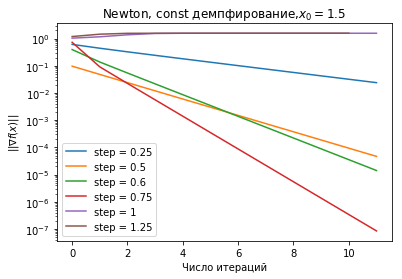

In [13]:
for i in range(len(dempf_const_results)):
    plt.plot(range(len(dempf_const_results[i])),dempf_const_results[i],label="step = "+str_step[i])
plt.title(r"Newton, const демпфирование,$x_0=1.5$")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
plt.yscale("log")

Увеличивающийся шаг

In [14]:
def dempf_incrasing_newton(inv_hes,grad_f,step,coef,x_start,iterations):
    x=x_start
    gradients=[]
    for i in range(iterations):
        x=x-step*inv_hes(x)*grad_f(x)
        gradients.append(np.abs(grad_f(x)))
        step*=coef
    return x,gradients

In [15]:
dempf_incr_results=[]
str_coef=["0.5","0.6","0.7","0.75","0.8","0.9","1"]
for coef in [0.5,0.6,0.7,0.75,0.8,0.9,1]:
    dempf_incr_results.append(dempf_incrasing_newton(inv_hes=inv_hes,grad_f=grad_f,step=1,coef=coef,x_start=1.5,iterations=12)[1])

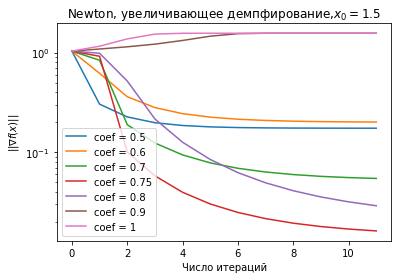

In [16]:
for i in range(len(dempf_incr_results)):
    plt.plot(range(len(dempf_incr_results[i])),dempf_incr_results[i],label="coef = "+str_coef[i])
plt.title(r"Newton, увеличивающее демпфирование,$x_0=1.5$")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
plt.yscale("log")

Армихо

In [17]:
def dempf_armijo_newton(f,inv_hes,grad_f,c,x_start,iterations):
    x=x_start
    gradients=[]
    alpha=1
    for i in range(iterations):
        d=-inv_hes(x)*grad_f(x)
        phi_0=f(x)
        phi_der_0=grad_f(x)*d
        x_tmp=x+alpha*d
        #backtracking
        while f(x_tmp)>phi_0+c*alpha*phi_der_0:
            alpha*=0.5
            x_tmp=x+alpha*d
        x+=alpha*d
        alpha*=2
        gradients.append(np.abs(grad_f(x)))
    return x,gradients

In [18]:
dempf_armijo_results=[]
str_c=["0.1","0.2","0.3","0.4"]
for coef in [0.1,0.2,0.3,0.4]:
    dempf_armijo_results.append(dempf_armijo_newton(f=f,inv_hes=inv_hes,grad_f=grad_f,c=coef,x_start=1.5,iterations=12)[1])

Text(0,0.5,'$||\\nabla f(x)||$')

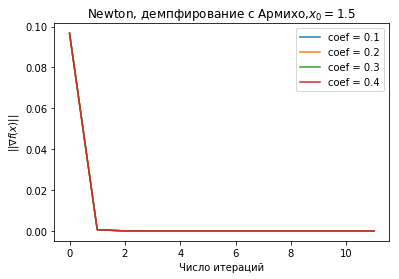

In [19]:
for i in range(len(dempf_armijo_results)):
    plt.plot(range(len(dempf_armijo_results[i])),dempf_armijo_results[i],label="coef = "+str_c[i])
plt.title(r"Newton, демпфирование с Армихо,$x_0=1.5$")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
#plt.yscale("log")

Кубический метод Ньютона

На каждой итерации нужно решать задачу вида

$x_{k+1} = \arg\min_y(f(x_k) + <\nabla f(x_k), y-x> + \frac{1}{2}<\nabla^2 f(x_k)(y-x), y-x> + \frac{M}{6}||y-x||^3)$

подставляем, получаем

$\phi(y) = x\arctan(x) - \frac{1}{2}\log(1+x^2) + \arctan(x)(y-x) + \frac{1}{2}\frac{1}{1+x^2}(y-x)^2 + \frac{3\sqrt{3}}{8}|y-x|^3$

При поиске минимума получим следующие выражения :

1) $x > 0 \Rightarrow y=x-\frac{8(-\nabla f(x_k) + \sqrt{\nabla f(x_k)^2 + \nabla^2 f(x_k)\frac{3\sqrt{3}}{4}})}{3\sqrt{3}}$


2) $x < 0 \Rightarrow y=x+\frac{8(-\nabla f(x_k) + \sqrt{\nabla f(x_k)^2 - \nabla^2 f(x_k)\frac{3\sqrt{3}}{4}})}{3\sqrt{3}}$

In [20]:
def phi(x, grad_f, hess_f):
    g, h = grad_f,hess_f
    if x >= 0:
        sq = np.sqrt(h**2+g*(3*np.sqrt(3)/4))
        answer=x-8*(-h+sq)/(2*np.sqrt(3))
    else:
        sq = np.sqrt(h**2-g*(3*np.sqrt(3)/4))
        answer=x+8*(-h+sq)/(2*np.sqrt(3))
    return answer

In [21]:
def hess_f(x):
    return 1/inv_hes(x)

In [22]:
def cube_newton(hess_f,grad_f,x_start,iterations):
    x=x_start
    gradients=[]
    for i in range(iterations):
        x=phi(x,grad_f(x),hess_f(x))
        gradients.append(np.abs(grad_f(x)))
    return x,gradients

In [23]:
cube_res=cube_newton(hess_f=hess_f,grad_f=grad_f,x_start=1.5,iterations=12)

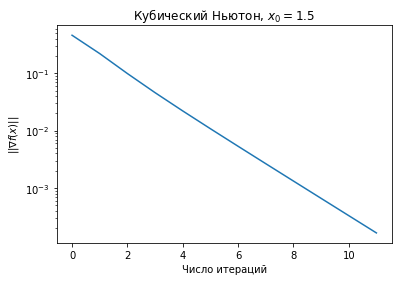

In [24]:
plt.plot(range(len(cube_res[1])),cube_res[1])
plt.title(r"Кубический Ньютон, $x_0=1.5$")
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||$")
plt.yscale('log')

__Вывод__ : методы способны решить проблему стартовой точки при грамотном подборе коэффициентов

## Задача 2

Вернемся к задаче логистической регресии на датасете _mushrooms_. Добавьте к этой задаче $\ell_2$-регуляризатор с $\lambda = L/100$. 

__(а)__ Для данной задачи реализуйте метод Ньютона и метод градиентного спуска. Попробуйте комбинировать эти два метода, чтобы добиться хорошего решения задачи регрессии, но избежать расходимости метода Ньютона. Как это будете делать? Постройте график сходимости.

Выпишем известные соотношения для логлоса

$$f(x)=\frac{1}{n}\sum \ln(1+e^{-x^TA_iy_i})+\frac{L}{100} x^Tx$$

#### $$\nabla f = \nabla_x \left(\frac{1}{n}\sum\limits_{i=1}^n \ln(1+e^{-y_ix^TA_i})+\lambda ||x||^2\right)=-\frac{1}{n}\sum\limits_{i=1}^n\sigma(-y_ix^TA_i)A_iy_i+2\lambda x$$

$$\nabla^2 f(x) = \frac{1}{n}\sum\limits_{i=1}^n A_iA_i^T\frac{e^{y_ix^TA_i}}{(1+e^{y_ix^TA_i})^2}+2\lambda E$$

$$L \leq \frac{1}{4n}||\sum\limits_{i=1}^nA_iA_i^T||$$

In [25]:
#Задаем функции для логлосса

def sigma(x):
    return 1/(1+np.exp(-x))

class log_function:
    def __init__(self,A,y,L):
        self.A=A
        self.y=y
        self.L=L
        
    def get_func(self,x):
        A=self.A
        y=self.y
        L=self.L
        return np.sum(np.log(np.ones(len(A))+np.exp(-y*np.dot(A,x.T))))/1624+L/100*np.dot(x,x)
        
    def get_grad(self, x):
        A=self.A
        y=self.y
        L=self.L
        sigmas=sigma(-y*np.dot(A,x.T))
        summ=np.dot(sigmas*y,A)
        return -summ/np.shape(A)[0]+x*L/50
    
    def get_hess(self,x):
        A=self.A
        y=self.y
        L=self.L
        n=1624
        H=np.zeros((112,112))
        for i in range(n):
            H+=np.outer(A[i],A[i])*np.exp(y[i]*np.dot(x.T,A[i]))/((1+np.exp(y[i]*np.dot(x.T,A[i])))**2)
        H=H/n+L/50*np.eye(112)
        return H
    
    def get_inv_hess(self,x):
        return np.linalg.inv(self.get_hess(x))
    
    def get_L(self):
        return self.L

In [26]:
#Считаем L по формуле из пятой домашки через оценку Гессиана
def get_L(X):
    summ=0
    for row in X:
        summ+=np.outer(row,row.T)
    A=summ/1624/4
    L = max(np.linalg.eigvals(A)).real
    return L

In [27]:
#Импортируем данные
from sklearn.datasets import load_svmlight_file
import numpy as np
dataset = "mushrooms.txt" 
data = load_svmlight_file(dataset)
X, y = data[0].toarray(), data[1]
n, d = X.shape
y=y-1.5
y=2*y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2,test_size=0.8, random_state=41)

In [28]:
#Компонуем метод
def newton(f,x_start,iterations):
    x=x_start
    gradients=[]
    for i in range(iterations):
        grad=f.get_grad(x)
        x=x-np.dot(f.get_inv_hess(x),grad)
        gradients.append(np.linalg.norm(grad)**2)
    return x,gradients

def gradient_decline(f,step,x_start,iterations):
    gradients=[]
    x=x_start
    for i in range(iterations):
        grad=f.get_grad(x)
        x=x-step*grad
        gradients.append(np.linalg.norm(grad)**2)
    return x,gradients

def combination(f,step,x_start,iterations_gd,iterations_nw):
    x,gradients = gradient_decline(f=f,step=step,x_start=x_start,iterations=iterations_gd)
    x,tmp       = newton(f=f,x_start=x,iterations=iterations_nw)
    gradients+=tmp
    return x,gradients

## Тесты при различных моментах перехода с GD на Ньютона

Дадим Ньютону шаги __[5,10]__, а GD шаги __[70,80,90,100]__ и посмотрим как сходится эти $2\cdot4=8$ методов. Начальная точка - 15 по всем координатам

In [29]:
#Первый шаг в паре идет GD, второй идет Ньютону
steps=[[70,5],[80,5],[90,5],[100,5],[70,10],[80,10],[90,10],[100,10]]
str_steps=["70","80","90","100"]

In [30]:
Func=log_function(X_train,y_train,get_L(X_train))

In [31]:
results=[]
for i in range(len(steps)):
    results.append(combination(Func,1/Func.get_L(),15*np.ones(112),steps[i][0],steps[i][1])[1])

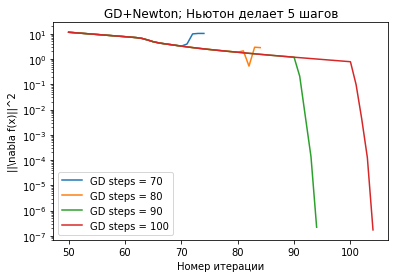

In [32]:
#for i in range(len(results)):
for i in range(4):
    plt.plot(range(50,50+len(results[i][50:])),results[i][50:],label="GD steps = " + str_steps[i])
plt.ylabel(r"||\nabla f(x)||^2")
plt.xlabel("Номер итерации")
plt.yscale("log")
plt.title("GD+Newton; Ньютон делает 5 шагов")
plt.legend()

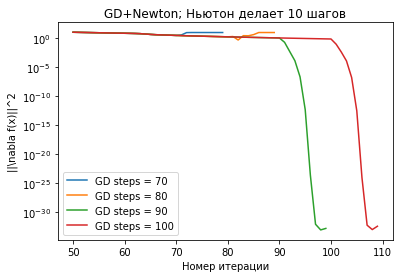

In [33]:
for i in range(4,8,1):
    plt.plot(range(50,50+len(results[i][50:])),results[i][50:],label="GD steps = " + str_steps[i-4])
plt.ylabel(r"||\nabla f(x)||^2")
plt.xlabel("Номер итерации")
plt.yscale("log")
plt.title("GD+Newton; Ньютон делает 10 шагов")
plt.legend()

__Вывод__ :  Как и ожидалось, без достаточного количества предварительных шагов GD, Ньютон не будет сходиться

__(б)__ Для данной задачи реализуйте квазиньютоновские методы: Бройдена, DFP, BFGS (смотри Главу 6 из [книги](https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf), а особенности реализации можно посмотреть [здесь](https://github.com/scipy/scipy/blob/v0.18.1/scipy/optimize/optimize.py#L874-L976)), L-BFGS (смотри [статью](http://users.iems.northwestern.edu/~nocedal/PDFfiles/limited-memory.pdf)). Решите с помощью них задачу регресии. Постйроте графики сходимости и изменения accuracy. Сделайте вывод.

In [34]:
def get_accuracy(answer):
    y_pred=np.dot(answer,X_test.T)
    bool_arr = np.sign(y_pred) == np.sign(y_test) #Считаем ответ угаданным, если совпал знак
    result_arr = np.where(bool_arr, 1, 0)
    return np.sum(result_arr)/len(result_arr)

In [35]:
def Broyden(f,x_start,iterations,step=1):
    func=lambda x:f.get_func(x)
    der =lambda x:f.get_grad(x)
    xes=[]
    x=x_start
    xnew=x
    H=f.get_inv_hess(x_start)
    Bk=f.get_hess(x_start)
    newgrad=f.get_grad(x)
    gradients=[]
    for i in range(iterations):
        grad=newgrad
        x=xnew
        gradients.append(np.linalg.norm(grad)**2)
        xes.append(x)
        p=-np.dot(H,grad)
        xnew=x+step*p
        
        s=xnew-x
        newgrad=f.get_grad(xnew)
        y=newgrad-grad
        #broyden:
        q=s-np.dot(H,y)
        mu=1/np.dot(q.T,y)
        if(i%10==0): #На каждой десятой итерации будем считать честный обратный гессиан
            H=f.get_inv_hess(xnew)
        else:
            H=H+mu*np.outer(q,q)
    return xes,gradients

In [36]:
Broyden_res=Broyden(Func,15*np.ones(112),45)

Text(0,0.5,'$||\\nabla f(x)||^2$')

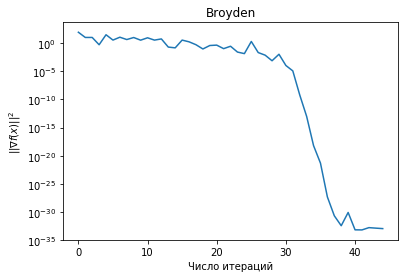

In [37]:
plt.plot(range(len(Broyden_res[1])),Broyden_res[1])
plt.yscale('log')
plt.title("Broyden")
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||^2$")

Text(0,0.5,'accuracy')

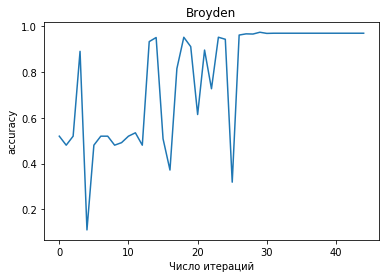

In [38]:
Broyden_accuracy=[]
for i in range(0,len(Broyden_res[0])):
    Broyden_accuracy.append(get_accuracy(Broyden_res[0][i]))
    
plt.plot(range(len(Broyden_res[0])),Broyden_accuracy)
plt.title("Broyden")
plt.xlabel("Число итераций")
plt.ylabel("accuracy")

In [39]:
def DFP(f,x_start,iterations,step=1):
    func=lambda x:f.get_func(x)
    der =lambda x:f.get_grad(x)
    x=x_start
    xnew=x
    xes=[]
    H=f.get_inv_hess(x_start)
    Bk=f.get_hess(x_start)
    newgrad=f.get_grad(x)
    gradients=[]
    for i in range(iterations):
        grad=newgrad
        x=xnew
        gradients.append(np.linalg.norm(grad)**2)
        xes.append(x)
        p=-np.dot(H,grad)
        xnew=x+step*p
        
        s=xnew-x
        newgrad=f.get_grad(xnew)
        y=newgrad-grad
        #DFP:
        Hy=np.dot(H,y)
        mu1=1/np.dot(s,y)
        mu2=-1/np.dot(Hy,y)
        if(i%10==0):
            H=f.get_inv_hess(xnew)
        else:
            H=H+mu1*np.outer(s,s)+mu2*np.outer(Hy,Hy)
    return xes,gradients

In [40]:
DFP_res=DFP(Func,15*np.ones(112),50)

Text(0,0.5,'$||\\nabla f(x)||^2$')

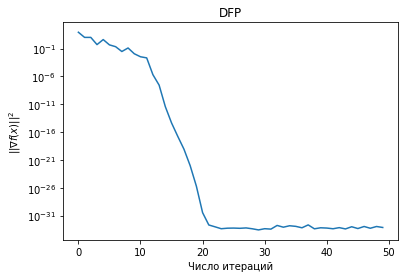

In [41]:
plt.plot(range(len(DFP_res[1])),DFP_res[1])
plt.yscale("log")
plt.title("DFP")
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||^2$")

Text(0,0.5,'accuracy')

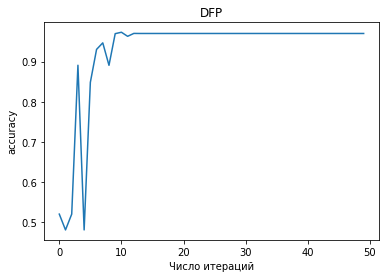

In [42]:
DFP_accuracy=[]
for i in range(0,len(DFP_res[0])):
    DFP_accuracy.append(get_accuracy(DFP_res[0][i]))
    
plt.plot(range(len(DFP_res[0])),DFP_accuracy)
plt.title("DFP")
plt.xlabel("Число итераций")
plt.ylabel("accuracy")

In [43]:
import scipy.optimize as opt

In [44]:
def BFGS(f,x_start,iterations):
    func=lambda x:f.get_func(x)
    der =lambda x:f.get_grad(x)
    x=x_start
    xnew=x
    xes=[]
    H=f.get_inv_hess(x_start)
    newgrad=f.get_grad(x)
    gradients=[]
    alpha=1
    for i in range(iterations):
        grad=newgrad
        x=xnew
        xes.append(x)
        gradients.append(np.linalg.norm(grad)**2)
        p=-np.dot(H,grad)
        #Ищем альфу, уд Wolfe condition лин поиском :
        alpha=opt.line_search(func,der,x,p)[0]
        xnew=x+alpha*p
        
        s=xnew-x
        newgrad=f.get_grad(xnew)
        y=newgrad-grad
        ro=1/np.dot(y.T,s)
        #DFP:
        if(i%10==0):
            H=f.get_inv_hess(xnew)
        else:
            I=np.eye(112)
            H=np.dot(np.dot(I-ro*np.outer(s,y),H),I-ro*np.outer(y,s))+ro*np.outer(s,s)
    return xes,gradients

In [45]:
BFGS_res=BFGS(Func,15*np.ones(112),12)

Text(0,0.5,'$||\\nabla f(x)||^2$')

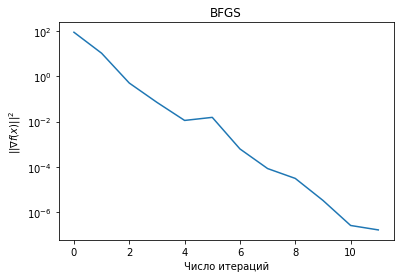

In [46]:
plt.plot(range(len(BFGS_res[1])),BFGS_res[1])
plt.yscale("log")
plt.title("BFGS")
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||^2$")

Text(0,0.5,'accuracy')

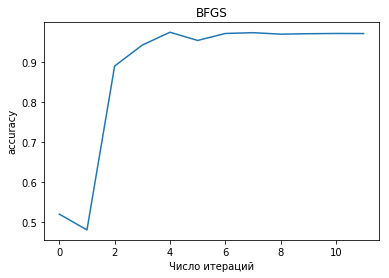

In [47]:
BFGS_accuracy=[]
for i in range(0,len(BFGS_res[0])):
    BFGS_accuracy.append(get_accuracy(BFGS_res[0][i]))
    
plt.plot(range(len(BFGS_res[0])),BFGS_accuracy)
plt.title("BFGS")
plt.xlabel("Число итераций")
plt.ylabel("accuracy")

In [48]:
def Hnew(H0,ys,ss,Vs_original):
    Vs=np.copy(Vs_original)
    m=len(Vs)
    summ=np.zeros((112,112))
    for n in range(m): #m итераций, еще одна в конце руками
        tmp=np.eye(112)
        if(n==0):
            ro=1
        else:
            ro=1/np.dot(ys[n-1],ss[n-1])
        
        #Первые умножения матриц V
        tmp=ro*tmp
        for i in range(m-n):
            tmp=np.dot(tmp,Vs[-i].T)
        #Выбираем матрицу на центр
        if (n==0):
            mid=H0
        else:
            mid=ss[n-1]*np.outer(ss[n-1],ss[n-1])
        
        tmp=np.dot(tmp,mid)
        #Обратные умножения матриц V
        for i in range(n,m):
            tmp=np.dot(tmp,Vs[i])
        summ+=tmp
    summ+=np.outer(ss[-1],ss[-1])/np.dot(ss[-1],ys[-1])
    return summ
        

def L_BFGS(f,x_start,iterations,m=3):
    func=lambda x:f.get_func(x)
    der =lambda x:f.get_grad(x)
    ys=[] #Хранит последние m векторов y
    ss=[] #Хранит последние m векторов s 
    Vs=[] #Хранит последние m матриц V
    x=x_start
    xnew=x
    xes=[]
    H=f.get_inv_hess(x_start)
    H0=H
    newgrad=f.get_grad(x)
    gradients=[]
    alpha=1
    for i in range(m):
        grad=newgrad
        x=xnew
        xes.append(x)
        gradients.append(np.linalg.norm(grad)**2)
        p=-np.dot(H,grad)
        #Ищем альфу, уд Wolfe condition лин поиском :
        alpha=opt.line_search(func,der,x,p)[0]
        xnew=x+alpha*p
        
        s=xnew-x
        ss.append(s)
        newgrad=f.get_grad(xnew)
        y=newgrad-grad
        ys.append(y)
        ro=1/np.dot(y.T,s)
        I=np.eye(112)
        H=np.dot(np.dot(I-ro*np.outer(s,y),H),I-ro*np.outer(y,s))+ro*np.outer(s,s)
        Vs.append(I-ro*np.outer(y,s))
    
    for i in range(iterations-m):
        Vs=Vs[1:]
        ys=ys[1:]
        ss=ss[1:]
        
        grad=newgrad
        x=xnew
        xes.append(x)
        gradients.append(np.linalg.norm(grad)**2)
        p=-np.dot(H,grad)
        #Ищем альфу, уд Wolfe condition лин поиском :
        alpha=opt.line_search(func,der,x,p)[0]
        xnew=x+alpha*p
        
        s=xnew-x
        ss.append(s)
        newgrad=f.get_grad(xnew)
        y=newgrad-grad
        ys.append(y)
        ro=1/np.dot(y.T,s)
        Vs.append(I-ro*np.outer(y,s))
        H=Hnew(H0,ys=ys,ss=ss,Vs_original=Vs)
        
    return xes,gradients

In [49]:
str_ls=["1","2","3"]
ms=[1,2,3]
ls_results=[]
for i in range(len(ms)):
    ls_results.append(L_BFGS(Func,15*np.ones(112),20,m=ms[i]))

Text(0.5,1,'L-BFGS при различных m')

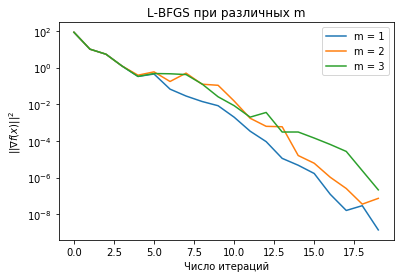

In [50]:
for i in range(len(ls_results)):
    plt.plot(range(len(ls_results[i][1])),ls_results[i][1],label="m = "+str_ls[i])
plt.yscale('log')
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||^2$")
plt.title("L-BFGS при различных m")

Text(0,0.5,'accuracy')

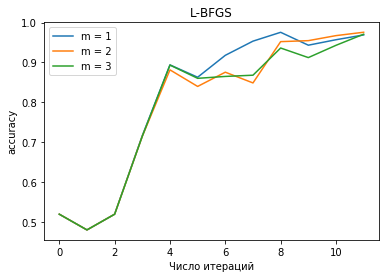

In [51]:
L_BFGS_accuracy=[[],[],[]]
for j in range(0,len(BFGS_res[0])):
        L_BFGS_accuracy[0].append(get_accuracy(ls_results[0][0][j]))
        L_BFGS_accuracy[1].append(get_accuracy(ls_results[1][0][j]))
        L_BFGS_accuracy[2].append(get_accuracy(ls_results[2][0][j]))
        
for i in range(len(ls_results)):
    plt.plot(range(len(L_BFGS_accuracy[i])),L_BFGS_accuracy[i],label="m = "+str_ls[i])
plt.legend()
plt.title("L-BFGS")
plt.xlabel("Число итераций")
plt.ylabel("accuracy")

### Сравнение

По accuracy

Text(0,0.5,'accuracy')

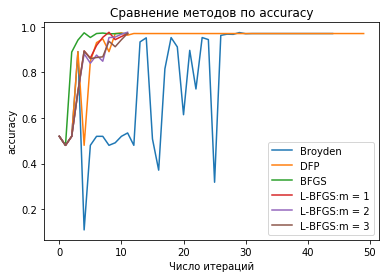

In [52]:
plt.plot(range(len(Broyden_res[0])),Broyden_accuracy,label='Broyden')
plt.plot(range(len(DFP_res[0])),DFP_accuracy,label="DFP")
plt.plot(range(len(BFGS_res[0])),BFGS_accuracy,label="BFGS")
for i in range(len(ls_results)):
    plt.plot(range(len(L_BFGS_accuracy[i])),L_BFGS_accuracy[i],label="L-BFGS:m = "+str_ls[i])
plt.title("Сравнение методов по accuracy")
plt.legend()
plt.xlabel("Число итераций")
plt.ylabel("accuracy")

По норме градиента :

Text(0,0.5,'$||\\nabla f(x)||^2$')

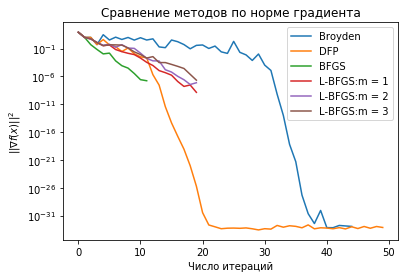

In [53]:
plt.plot(range(len(Broyden_res[1])),Broyden_res[1],label='Broyden')
plt.plot(range(len(DFP_res[1])),DFP_res[1],label="DFP")
plt.plot(range(len(BFGS_res[1])),BFGS_res[1],label="BFGS")
for i in range(len(ls_results)):
    plt.plot(range(len(ls_results[i][1])),ls_results[i][1],label="L-BFGS:m = "+str_ls[i])
plt.legend()
plt.yscale('log')
plt.title("Сравнение методов по норме градиента")
plt.xlabel("Число итераций")
plt.ylabel(r"$||\nabla f(x)||^2$")

__Вывод__: Бройден и DFP по accuracy проигрывают методам вида BFGS; из BFGS-ов лучше всех по итерациям себя показывает стандартный метод, но  L_BFGS эффективнее по памяти, что может играть рещающую роль при решении больших задач(когда из-за размеров задачи матрицы, BFGS начнет вылезать за оперативку, L_BFGS начнет его очень сильно обгонять по времени)